Predicting House prices : Regression model

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [3]:
print(train_data.shape)
print(test_data.shape)
# 13 are the no. of features here

(404, 13)
(102, 13)


In [4]:
# Normalizing the data

mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data -= mean
train_data /=std

test_data -= mean
test_data /= std

In [5]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1) # scalar regression (predicting a single continous value)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [6]:
# we will use K-fold Validation as we have veryfew data points

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k) :
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples], train_data[(i+1) * num_val_samples :]]
  )
  partial_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples], train_targets[(i+1) * num_val_samples :]]
  )

  model = build_model()
  # trains the model (in silent mode, verbose = 0)
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
                      epochs = num_epochs, batch_size = 16, verbose = 0)
  # saving the logs at each fold
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [7]:
# building the history of succesive mean K-fold validation scores

avg_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [8]:
print(len(all_mae_histories))
print(len(all_mae_histories[0]))
print(len(avg_mae_history))

4
500
500


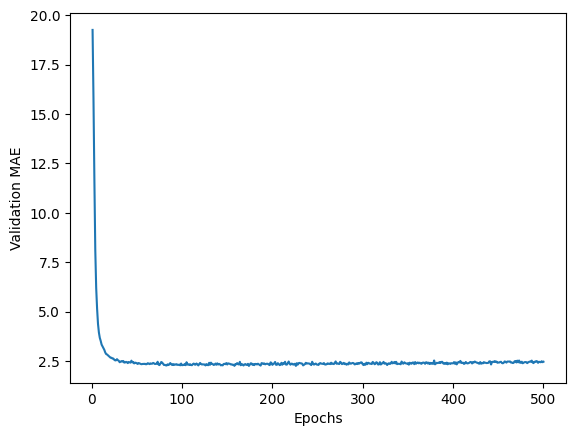

In [9]:
plt.plot(range(1, len(avg_mae_history) + 1), avg_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

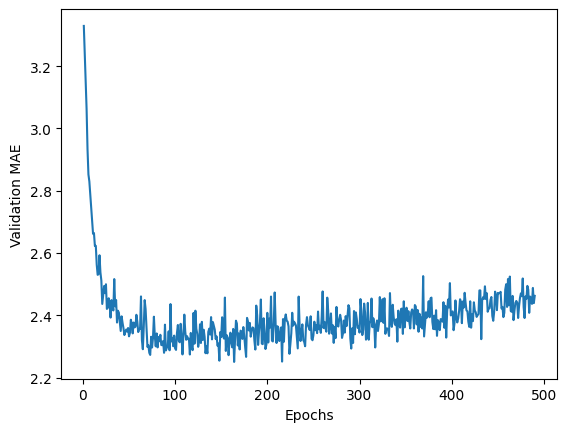

In [10]:
#Plotting validation score, excluding first 10 data points
truncated_mae_history = avg_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [11]:
# Training the final model (entire data)

model = build_model()
model.fit(train_data, train_targets,
          epochs = 130, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 4ms/step - loss: 14.6120 - mae: 2.5737


In [12]:
predictions = model.predict(test_data)
print(predictions[0])
print(test_targets[0])

4/4 [==============================] - 0s 3ms/step
[7.3167086]
7.2
